In [1]:
## Importing libraries

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
    'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'
]

df = pd.read_csv( 'housing.csv', delim_whitespace=True, names=columns )

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
## checking the number of rows and columns
print( df.shape )

(506, 14)


In [4]:
## Check for missing values
df.isnull().sum()  

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [5]:
## Stadistics measures
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

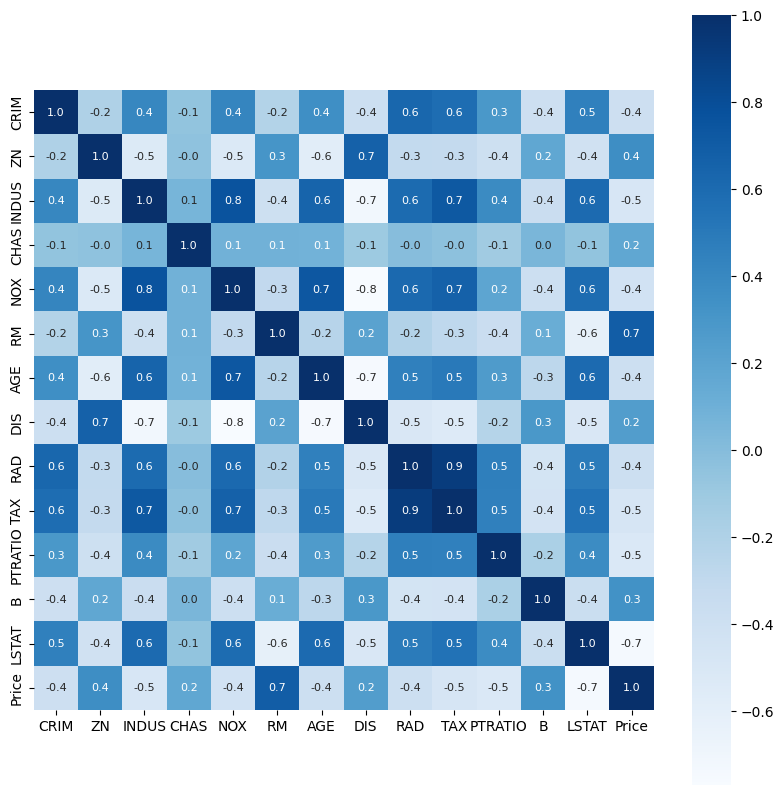

In [6]:
# constructing a heatmap to nderstand the correlation

correlation = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [7]:
# Features (X) and target (y)
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']  # Target variable

print( X.shape, y.shape )  


(506, 13) (506,)


In [8]:
# Step 3: Split the Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
## Make predictions
y_pred = model.predict(X_test)

print( y_pred.shape )

# Intercept (b)
intercept = model.intercept_

# Coefficients (w1, w2, ..., wk)
coefficients = model.coef_

# Features (X) - the column names (if using a DataFrame)
feature_names = X.columns  # If you're using a pandas DataFrame

# Print the linear equation
equation = f"Price = {intercept:.2f}"
for coef, feature in zip(coefficients, feature_names):
    equation += f" + ({coef:.2f} * {feature})"

print("Linear Regression Equation:")
print(equation)


(102,)
Linear Regression Equation:
Price = 30.25 + (-0.11 * CRIM) + (0.03 * ZN) + (0.04 * INDUS) + (2.78 * CHAS) + (-17.20 * NOX) + (4.44 * RM) + (-0.01 * AGE) + (-1.45 * DIS) + (0.26 * RAD) + (-0.01 * TAX) + (-0.92 * PTRATIO) + (0.01 * B) + (-0.51 * LSTAT)


In [10]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 24.29111947497374
R-squared: 0.6687594935356289


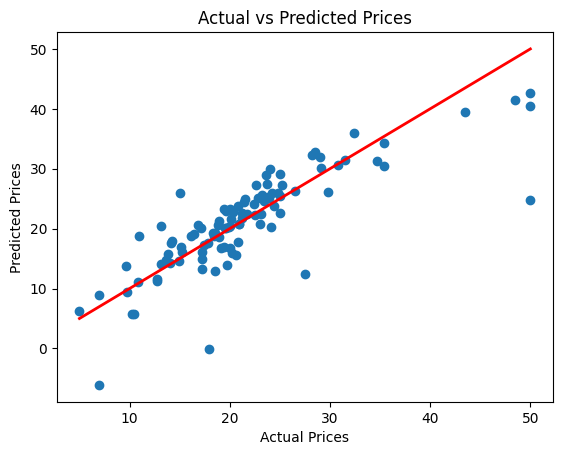

In [11]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()